In [219]:
import numpy as np
import cPickle as pickle
import pandas as pd
from sklearn import cross_validation
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier 
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import f1_score
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
meanSentiment = "../Final_features/median_sentiments.csv"
aesthetic_csv = "../Final_features/total_aesthetic.pk"
audiopop_csv = "../Final_features/popAudio_features.csv"
audioUnpop_csv = "../Final_features/unpopAudioFeatures.csv"
socialFeatures = "../Final_features/postSocialMetaFeatures.pk"

In [57]:
def readFeatureFile(color_features):
    with open(color_features) as g:
        featureLines = g.readlines()
    print len(featureLines)
    return featureLines


def readAudioFeatures(lines):
    featureDict = {}
    
    for line in lines:
        components = line.strip().split(',')
        postId = components[0].strip().split('.')[0]
        feats = [float(x) for x in components[1:]]
        cleanFeats = []
        for x in feats:
            if str(x) != 'nan':
                cleanFeats.append(float(x))
            else:
                cleanFeats.append(0.0)
        featureDict[postId] = cleanFeats
            
    return featureDict

def readSentiFeatures(lines):
    sentiDict = {}
    for line in lines:
        comp = line.split(',')
        sentiDict[comp[0]] = float(comp[1].strip())
    return sentiDict

def mergeAllFeatures(aesthetic , sentiment , audio , social):
    totalMatrix = []
    for aes in aesthetic:
        if aes[0] in sentiment:
            if aes[0] in audio:
                if aes[0] in social:
                    postid = aes[0]
                    aesVec = np.asarray(map(lambda x: float(x),aes[1:]) , dtype = "float32").reshape((1,-1))
                    audioVec = np.asarray(map(lambda x: float(x),audio[postid]) , dtype = "float32").reshape((1,-1))
                    sentimentVec = np.asarray(map(lambda x: float(x),[sentiment[postid]]) , dtype = "float32").reshape((1,-1))
                    socialVec = np.asarray(map(lambda x: int(x),social[postid]) , dtype = "int32" ).reshape((1,-1))
                    
                    finalFeatureVec = np.concatenate((aesVec,audioVec,sentimentVec,socialVec), axis = 1)
                    totalMatrix.append(finalFeatureVec)
    print len(totalMatrix)
    return np.vstack(totalMatrix)

def convertToDict(social):
    socialDict = {}
    print len(social)
    for i in social:
        social_feats = i[1:]
        key = i[0]
        socialDict[key] = social_feats 
    return socialDict
        

In [6]:
f = open(aesthetic_csv , "r+")
aesFeats = pickle.load(f)
f.close()


In [7]:
print aesFeats.shape

(18474, 20)
(18474, 20)


In [8]:
f = open(socialFeatures , "r+")
socialFeats = pickle.load(f)
f.close()
print socialFeats[104]

['1294156026651774976', 835975, 241, 568489.0, 18158, 5979]
['1294156026651774976', 835975, 241, 568489.0, 18158, 5979]


In [9]:
popAudio_csv = readFeatureFile(audiopop_csv)

11446
11446


In [10]:
unpopAudio_csv = readFeatureFile(audioUnpop_csv)

11992
11992


In [11]:
totalFeats = popAudio_csv + unpopAudio_csv
audioDict = readAudioFeatures(totalFeats)

In [12]:
ex =  audioDict['1381729172183040000']

In [13]:
print ex

[0.0, 0.16844, 40.915827, 0.10944, 0.7735, 0.333333]
[0.0, 0.16844, 40.915827, 0.10944, 0.7735, 0.333333]


In [14]:
senti_csv = readFeatureFile(meanSentiment)

23441
23441


In [15]:
sentiDict = readSentiFeatures(senti_csv)

In [16]:
sentiDict['1381729172183040000']

3.6

3.6

In [17]:
print socialFeats[1:10]

[['1379007357325344768', 33, 258, 18.0, 2, 0], ['1384812946315706368', 183, 86, 14.0, 1, 0], ['1380550788883312640', 0, 1, 4.0, 0, 0], ['1381683778946232320', 113, 57, 6.0, 0, 0], ['1379179530505383936', 175, 174, 3.0, 1, 0], ['1386151370364739584', 427, 105, 3.0, 0, 0], ['1286103711319764992', 51027, 389, 673549.0, 21849, 8150], ['1382613942450405376', 136, 167, 14.0, 1, 0], ['1380365152318537728', 4, 11, 5.0, 0, 0]]
[['1379007357325344768', 33, 258, 18.0, 2, 0], ['1384812946315706368', 183, 86, 14.0, 1, 0], ['1380550788883312640', 0, 1, 4.0, 0, 0], ['1381683778946232320', 113, 57, 6.0, 0, 0], ['1379179530505383936', 175, 174, 3.0, 1, 0], ['1386151370364739584', 427, 105, 3.0, 0, 0], ['1286103711319764992', 51027, 389, 673549.0, 21849, 8150], ['1382613942450405376', 136, 167, 14.0, 1, 0], ['1380365152318537728', 4, 11, 5.0, 0, 0]]


In [58]:
socialDict = convertToDict(socialFeats)

22192
22192


In [59]:
print socialDict[socialDict.keys()[1]]

[152, 78, 3.0, 0, 0]
[152, 78, 3.0, 0, 0]


In [60]:
totMatrix = mergeAllFeatures(aesFeats , sentiDict , audioDict , socialDict)

16431
16431


In [61]:
totMatrix.shape

(16431, 31)

(16431, 31)

In [62]:
FeatureMatrix = totMatrix[:,:-3] 
labelNumbers = totMatrix[:,-3:]

In [63]:
print FeatureMatrix.shape , labelNumbers.shape

(16431, 28) (16431, 3)
(16431, 28) (16431, 3)


In [72]:
print np.mean(labelNumbers[:,0])

237084.271073
237084.271073


In [73]:
medianPopReposts = 2173.0
meanPopReposts = 16064.0

medianPopLikes = 7544.0
meanPopLikes = 42521.0

medianPopLoops = 318566.0
meanPopLoops = 2405671.0

In [247]:
def createLabels(labelNumbers , variable , threshold , scalar):
    Labels = np.zeros(labelNumbers.shape[0])
    for i in range(labelNumbers.shape[0]):
        if labelNumbers[i][variable] > (scalar*threshold):
            Labels[i] = 1
    return Labels

def iterateTraining(FeatureMatrix , labelNumbers , variable , start , stop , steps):
    intervals = (stop-start)/steps
    divisions = np.arange(start, stop , intervals )
    fscores = []
    feature_importance = []
    accuracies = []
    errors = []
    for d in divisions: 
        LoopLabels = createLabels(labelNumbers ,  variable , d , 1)
        X_train, X_test, y_train, y_test = cross_validation.train_test_split(FeatureMatrix, LoopLabels, test_size=0.3, random_state=0)
        clfRF = RandomForestClassifier(n_estimators=28)
        clfRF.fit(X_train, y_train)
        RF_predict = clfRF.predict(X_test)
        
        print "Videos Classified as Popular %f "%(np.sum(LoopLabels)/LoopLabels.shape[0])
        
        error_RF = mean_squared_error(y_test, RF_predict)
        errors.append(error_RF)
        
        accuracy = np.mean(y_test == RF_predict)
        accuracies.append(accuracy)
        
        feature_importance.append(clfRF.feature_importances_)
        
        fscore = f1_score(y_test, RF_predict, average='binary')
        fscores.append(fscore)
    return accuracies, errors , fscores,  np.vstack(feature_importance)

In [201]:
LoopLabels = createLabels(labelNumbers , 2 , medianPopReposts , 1)

In [202]:
print (np.sum(LoopLabels)/LoopLabels.shape[0])

0.11180086422


In [204]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(FeatureMatrix, LoopLabels, test_size=0.3, random_state=0)

In [205]:

clfRF = RandomForestClassifier(n_estimators=28)
clfRF.fit(X_train, y_train)
RF_predict = clfRF.predict(X_test)


In [206]:
error_RF = mean_squared_error(y_test, RF_predict)
print error_RF

0.089046653144


In [207]:
print np.mean(y_test == RF_predict)

0.910953346856


In [208]:
print clfRF.feature_importances_
print clfRF.n_features_

[ 0.          0.03379933  0.02536298  0.02234019  0.02347883  0.02617789
  0.02684348  0.02543979  0.02662519  0.02288994  0.01625699  0.
  0.02359906  0.02738487  0.02626645  0.02271969  0.02559568  0.0224741
  0.01405975  0.02348834  0.03183248  0.02927121  0.02924884  0.028959
  0.01870575  0.01886877  0.34136511  0.06694628]
28


In [200]:
f1_score(y_test, RF_predict, average='binary')

0.9161246148579254

In [259]:
accuracies_total, errors_total , fscores_total, feature_importance_total  = iterateTraining(FeatureMatrix , labelNumbers , 1 , 0.1*medianPopLikes , medianPopLikes , 25)

Videos Classified as Popular 0.306433 
Videos Classified as Popular 0.286166 
Videos Classified as Popular 0.265778 
Videos Classified as Popular 0.251841 
Videos Classified as Popular 0.240460 
Videos Classified as Popular 0.230296 
Videos Classified as Popular 0.220620 
Videos Classified as Popular 0.211734 
Videos Classified as Popular 0.204370 
Videos Classified as Popular 0.197067 
Videos Classified as Popular 0.188242 
Videos Classified as Popular 0.181304 
Videos Classified as Popular 0.174305 
Videos Classified as Popular 0.168158 
Videos Classified as Popular 0.161585 
Videos Classified as Popular 0.156777 
Videos Classified as Popular 0.151665 
Videos Classified as Popular 0.147283 
Videos Classified as Popular 0.143205 
Videos Classified as Popular 0.138762 
Videos Classified as Popular 0.134867 
Videos Classified as Popular 0.131763 
Videos Classified as Popular 0.127746 
Videos Classified as Popular 0.124582 
Videos Classified as Popular 0.122147 


25


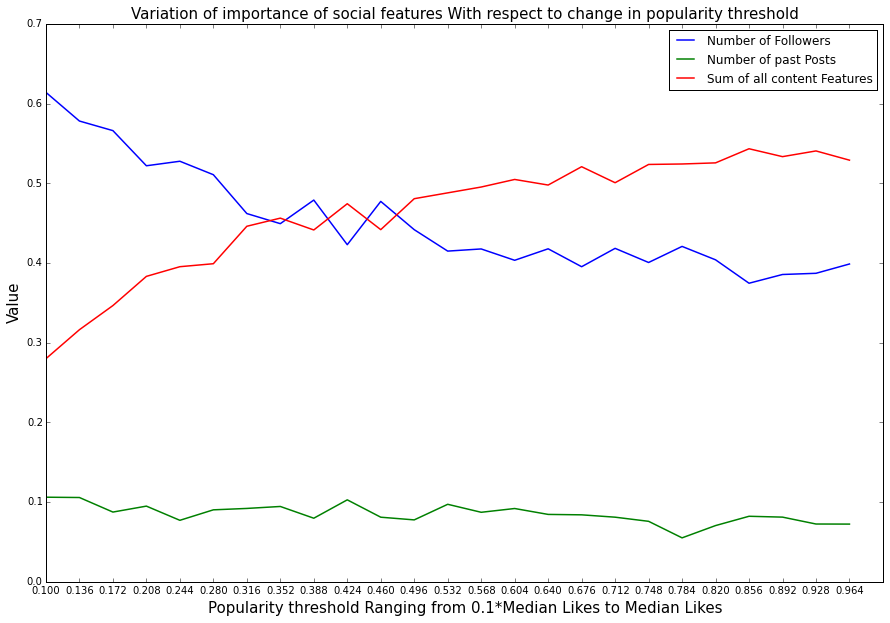

In [260]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.title("Variation of importance of social features With respect to change in popularity threshold", fontsize = 15)
plt.xlabel("Popularity threshold Ranging from 0.1*Median Likes to Median Likes ",fontsize = 15)
plt.ylabel("Value",fontsize = 15)

content_feature_importance = [np.sum(feature_importance_total[i,:26]) for i in range(feature_importance_total.shape[0])]
print len(content_feature_importance)
x = np.array(np.arange(0.1 , 1 , 0.9/25))
plt.plot(x , feature_importance_total[:,26],linewidth = 1.5)
plt.plot(x , feature_importance_total[:,27],linewidth = 1.5)
plt.plot(x , content_feature_importance,linewidth = 1.5)

plt.xticks( x )

plt.legend(['Number of Followers', 'Number of past Posts' ,'Sum of all content Features'  
           ])
plt.show()

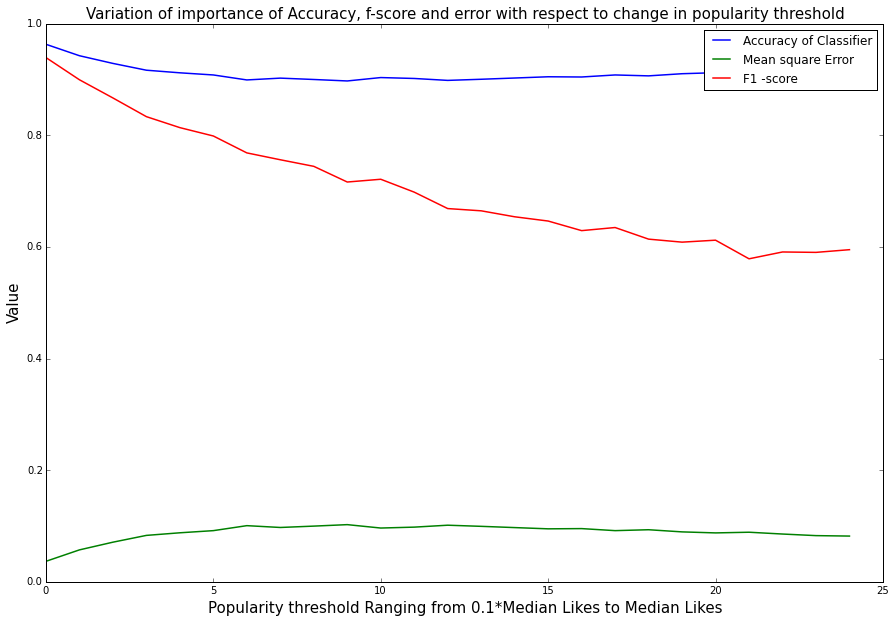

In [261]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.title("Variation of importance of Accuracy, f-score and error with respect to change in popularity threshold", fontsize = 15)
plt.xlabel("Popularity threshold Ranging from 0.1*Median Likes to Median Likes ",fontsize = 15)
plt.ylabel("Value",fontsize = 15)
plt.plot(accuracies_total,linewidth = 1.5)
plt.plot(errors_total,linewidth = 1.5)
plt.plot(fscores_total,linewidth = 1.5)

plt.legend(['Accuracy of Classifier', 'Mean square Error', 'F1 -score'   
           ])
plt.show()